In [13]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils.load_brad_trace import load_trace, create_concurrency_dataset, load_trace_all_version

In [3]:
chunwei_trace = "/Users/ziniuw/Desktop/research/Data/real_traces/c2_results_parsed.xlsx"
raw = pd.read_excel(chunwei_trace)

In [30]:
raw.head(10)

,query_id,original_query_id,CreatedAt,Duration,HasResultSet,Id,QueryString,RedshiftPid,RedshiftQueryId,ResultRows,ResultSize,Status,UpdatedAt,WorkgroupName,CreatedAt_UNIX,UpdatedAt_UNIX,unix_duration,ProfilerId
0,6180777e-5c59-4b43-9d8a-0c93476050ef,0,2024-02-02 22:47:01.497,54086565,False,6180777e-5c59-4b43-9d8a-0c93476050ef,SET enable_result_cache_for_session TO off;,1073799275,0,0,0,FINISHED,2024-02-02 22:47:01.977,default-workgroup,1.706932e+09,1.706932e+09,0.480,NaN
1,6e346544-4b6f-4e37-944f-4b1534be31a8,63643554,2024-02-02 22:47:02.984,9219695,True,6e346544-4b6f-4e37-944f-4b1534be31a8,/* profiler_id=63643554 */ select\n sum(l_e...,1073782903,15291825,1,14,FINISHED,2024-02-02 22:47:03.552,default-workgroup,1.706932e+09,1.706932e+09,0.568,63643554.0
2,679652c6-dd51-455c-a642-a7370b5a9f57,63643560,2024-02-02 22:47:03.204,11844296,True,679652c6-dd51-455c-a642-a7370b5a9f57,/* profiler_id=63643560 */ select\n sum(l_e...,1073930517,15291830,1,13,FINISHED,2024-02-02 22:47:03.741,default-workgroup,1.706932e+09,1.706932e+09,0.537,63643560.0
3,a3f34ad9-cd4e-4a3c-a14f-721be13cbec7,63643571,2024-02-02 22:47:03.419,9512792,True,a3f34ad9-cd4e-4a3c-a14f-721be13cbec7,/* profiler_id=63643571 */ select\n sum(l_e...,1073938551,15291835,1,14,FINISHED,2024-02-02 22:47:03.926,default-workgroup,1.706932e+09,1.706932e+09,0.507,63643571.0
4,924c5fe0-4468-4e3a-b3d2-2f4058cae153,63643585,2024-02-02 22:47:04.435,74621459974,False,924c5fe0-4468-4e3a-b3d2-2f4058cae153,/* profiler_id=63643585 */ create table region...,1073774714,15368976,0,0,FINISHED,2024-02-02 22:48:19.472,default-workgroup,1.706932e+09,1.706932e+09,75.037,63643585.0
5,ce3c97e6-0759-4234-a380-63acfe8f37e4,63643589,2024-02-02 22:47:04.611,997625250995,False,ce3c97e6-0759-4234-a380-63acfe8f37e4,/* profiler_id=63643589 */ create table orders...,1073807636,15368975,0,0,FINISHED,2024-02-02 23:03:42.641,default-workgroup,1.706932e+09,1.706933e+09,998.030,63643589.0
6,1cf68cf2-a001-4929-902d-b68ab66b923d,63643589,2024-02-02 22:47:04.798,12844224,True,1cf68cf2-a001-4929-902d-b68ab66b923d,"/* profiler_id=63643589 */ select\n o_year,...",1073856858,15291844,2,34,FINISHED,2024-02-02 22:47:05.339,default-workgroup,1.706932e+09,1.706932e+09,0.541,63643589.0
7,f5576f64-fac1-4f31-96f4-1e408049c89d,63643598,2024-02-02 22:47:09.899,32168845357,True,f5576f64-fac1-4f31-96f4-1e408049c89d,/* profiler_id=63643598 */ select\n sum(l_e...,1073766650,15369011,1,14,FINISHED,2024-02-02 22:47:57.356,default-workgroup,1.706932e+09,1.706932e+09,47.457,63643598.0
8,6b6e4bdc-8cf4-4088-aec9-6dccfdd08b86,63643603,2024-02-02 22:47:12.612,32428790924,True,6b6e4bdc-8cf4-4088-aec9-6dccfdd08b86,/* profiler_id=63643603 */ select\n sum(l_e...,1073881281,15369007,1,14,FINISHED,2024-02-02 22:47:57.607,default-workgroup,1.706932e+09,1.706932e+09,44.995,63643603.0
9,e7774559-d290-471b-820f-dffdb306e2dc,63643607,2024-02-02 22:47:23.083,46789312137,False,e7774559-d290-471b-820f-dffdb306e2dc,/* profiler_id=63643607 */ create table region...,1073865019,15369004,0,0,FINISHED,2024-02-02 22:48:11.848,default-workgroup,1.706932e+09,1.706932e+09,48.765,63643607.0


In [16]:
all_start_time = raw['CreatedAt_UNIX'].values
all_rt = raw['unix_duration'].values
normalized_all_start_time = all_start_time - np.min(all_start_time)
query_id = np.arange(len(all_rt)) + 1
df = pd.DataFrame({"g_offset_since_start_s": normalized_all_start_time, "run_time_s": all_rt, "query_idx": query_id})
df = df.sort_values("g_offset_since_start_s", ascending=True)

In [17]:
concurrent_df = create_concurrency_dataset(df)

In [18]:
n_c_q = concurrent_df["num_concurrent_queries"].values

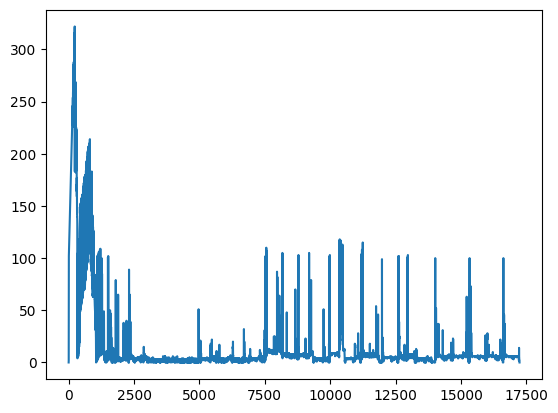

In [19]:
plt.plot(np.arange(len(n_c_q)), n_c_q)

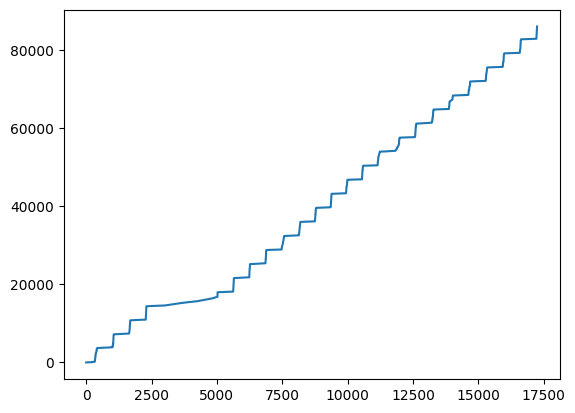

In [20]:
plt.plot(np.arange(len(n_c_q)), normalized_all_start_time)